In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
np.random.seed(0)
n = 10

X = np.linspace(0, 1, n)[:, np.newaxis]
Y = np.sin(2 * np.pi * X) + 0.02 * np.random.normal(size=n)[:, np.newaxis]

In [60]:
class PolynomialRegression():
    def __init__(self, degree = 1):
        self.degree = degree

        self.w = np.zeros(self.degree)
        self.b = 0

        self._model = lambda x: self.w.dot(x) + self.b

    def __call__(self, x):
        return self._model(self._preprocess(x))

    def train(self, X: np.ndarray, Y: np.ndarray, epoch = 2000, learning_rate = 0.01, lasso = 0, ridge = 0):
        n = len(X)

        costs = []

        sign = lambda x : 1 if x >= 0 else -1

        for _ in range(epoch):
            cost = 0
            
            for index in range(n):
                x, y = self._preprocess(X.item(index)), Y.item(index)

                prediction = self._model(x)

                error = prediction - y

                loss = (error ** 2) / 2

                cost += loss

                l1_update = lasso * np.array(list(map(sign, self.w)))

                l2_update = (2 * ridge) * self.w

                regularization_term = l1_update + l2_update

                update_term = ((error * x) + regularization_term)

                self.w -= learning_rate * update_term

                self.b -= learning_rate * error

            costs.append(cost)

        return costs

    def _preprocess(self, x):
        return np.array([x ** i for i in range(1, self.degree + 1)])

In [61]:
poly = PolynomialRegression(9)
poly_costs = poly.train(X, Y, 4000, 0.2)

In [62]:
ridge_poly = PolynomialRegression(9)
ridge_poly_costs = ridge_poly.train(X, Y, 4000, 0.06, ridge=0.001)

In [63]:
lasso_poly = PolynomialRegression(9)
lasso_poly_costs = lasso_poly.train(X, Y, 4000, 0.06, lasso=0.001)

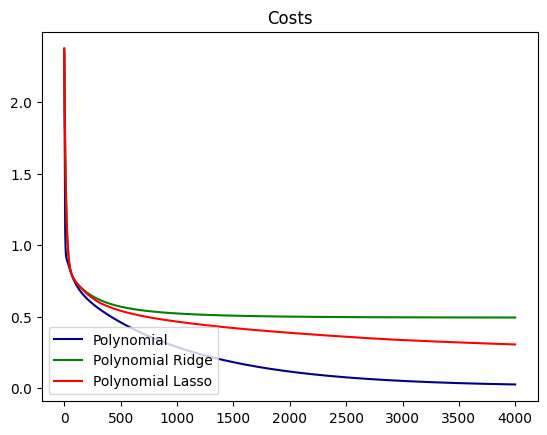

In [64]:
plt.plot(poly_costs, color='navy', label="Polynomial")
plt.plot(ridge_poly_costs, color='green', label="Polynomial Ridge")
plt.plot(lasso_poly_costs, color='red', label="Polynomial Lasso")

plt.title("Costs")
plt.legend(loc='lower left')

plt.show()

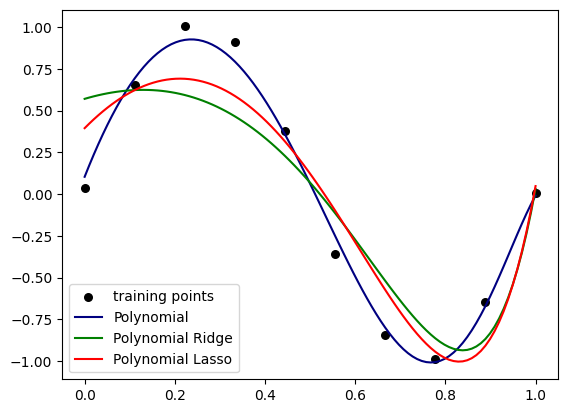

In [65]:
X_dummy = np.linspace(0, 1, 100)[:, np.newaxis]

plt.scatter(X, Y, color='black', s=30, marker='o', label="training points")

plt.plot(X_dummy, np.array(list(map(poly, X_dummy))), color='navy', label="Polynomial")

plt.plot(X_dummy, np.array(list(map(ridge_poly, X_dummy))), color='green', label="Polynomial Ridge")

plt.plot(X_dummy, np.array(list(map(lasso_poly, X_dummy))), color='red', label="Polynomial Lasso")

plt.legend(loc='lower left')
plt.show()